## Trabalho 2 - Supressão


### Objetivo

O trabalho consiste em implementar um algoritmo que realiza a supress ̃ao de parte dos valores de municípios de um conjunto de dados e avalia o impacto em um estudo de frequˆencia com base neste atributo.

In [3]:
# Importando dados para realização do trabalho
import os
import glob
import random
import polars as pl
import seaborn as sea
import matplotlib.pyplot as plt

Voce dever ́a implementar um algoritmo que inicialmente suprime aleatoriamente os valores do atributo MunicipioCaso com percentual
de supressão em 3 faixas diferentes, 25%, 50% e 75%. Para cada faixa voce dever ́a gravar um dataset resultado com o nome “dadoscovid-ce trab02 X.csv” onde “X”  ́e o valor do percentual de supressão no dataset. 

In [4]:
# Lendo o arquivo via polars
data = pl.read_csv(source='dataset\\dados_covid-ce_trab02.csv')

In [5]:
subset = data.select([
    pl.col(col).is_null().alias(col) for col in data.columns
]).sum()\
    .transpose(
        include_header=True
    )\
    .filter(pl.col('column_0')>0)

subset.head(3)

column,column_0
str,u32
"""idRedcap""",855803
"""idEsus""",180037
"""idSivep""",843457


In [6]:
print(f'Quantidade de nulos totais : {subset['column_0'].sum()}')
print(f'Quantidade de colunas com valores {subset['column'].count()} de {data.shape[1]}')
print(f'Colunas com valores nulos :\n * {'\n * '.join(subset['column'].to_numpy().tolist())}')

Quantidade de nulos totais : 32743702
Quantidade de colunas com valores 53 de 63
Colunas com valores nulos :
 * idRedcap
 * idEsus
 * idSivep
 * classificacaoEstadoRedcap
 * classificacaoEstadoEsus
 * classificacaoFinalEsus
 * evolucaoCasoEsus
 * cboEsus
 * profissionalSaudeEsus
 * paisCaso
 * bairroCasoGeocoder
 * idadeCaso
 * faixaEtaria
 * dataNascimento
 * dataNotificacao
 * dataSolicitacaoExame
 * dataColetaExame
 * dataResultadoExame
 * resultadoFinalExame
 * laboratorioExame
 * classificacaoEstadoSivep
 * dataInternacaoSivep
 * dataEntradaUTISivep
 * dataSaidaUTISivep
 * evolucaoCasoSivep
 * dataEvolucaoCasoSivep
 * comorbidadePuerperaSivep
 * comorbidadeCardiovascularSivep
 * comorbidadeHematologiaSivep
 * comorbidadeSindromeDownSivep
 * comorbidadeHepaticaSivep
 * comorbidadeAsmaSivep
 * comorbidadeDiabetesSivep
 * comorbidadeNeurologiaSivep
 * comorbidadePneumopatiaSivep
 * comorbidadeImunodeficienciaSivep
 * comorbidadeRenalSivep
 * comorbidadeObesidadeSivep
 * comorbidadeHi

&nbsp;

Criando a funções de supressao e para salvar os resultados

In [19]:
def fn_supressao(subset, porcentagem=0.25):
    TAM = subset.shape[0]
    print("_"*100)
    print("FN_SUPRESSAO")
    print(f"Supressão para coluna de {subset.name} com {porcentagem*100}% ({int(TAM*porcentagem)})")

    print("* Escolhendo 25% de instancias aleatoriamente para supressão dos respectivos valores")
    
    list_ = random.sample(range(TAM), k=int(TAM * porcentagem))
    print(f"* Instancias escolhidas\n   + ex: {', '.join(map(str, list_[:5]))}....")


    array_ = subset.to_numpy()
    
    print('* Supressão dos valores')

    array_[list_] = ""
    return pl.Series(name='municipioCaso', values=array_.tolist(), dtype=str)

In [22]:
def fn_supressao_to_csv(data:pl.DataFrame, porcentagens=[0.25, 0.50, 0.75]):  
    series = data['municipioCaso']
    for por in porcentagens:
        
        # Modificando coluna
        data = data.with_columns(
            [fn_supressao(series, porcentagem=por)]
        )

        string = str(por).replace('.', '_')
        print('* Salvando resultados')
        print(f' =>dataset_result\\Salvando dados_covid-ce_trab02_{string}.csv')

        os.makedirs(name='dataset_result', exist_ok=True)
        
        data.select(pl.col('municipioCaso')).write_csv(f'dataset_result\\dados_covid-ce_trab02_{string}.csv')
        print('')
    
    print("Processo Supressão finalizado!")

In [23]:
fn_supressao_to_csv(data)

____________________________________________________________________________________________________
FN_SUPRESSAO
Supressão para coluna de municipioCaso com 25.0% (213950)
* Escolhendo 25% de instancias aleatoriamente para supressão dos respectivos valores
* Instancias escolhidas
   + ex: 170600, 379106, 314168, 158315, 74268....
* Supressão dos valores
* Salvando resultados
 =>dataset_result\Salvando dados_covid-ce_trab02_0_25.csv

____________________________________________________________________________________________________
FN_SUPRESSAO
Supressão para coluna de municipioCaso com 50.0% (427901)
* Escolhendo 25% de instancias aleatoriamente para supressão dos respectivos valores
* Instancias escolhidas
   + ex: 256393, 66563, 365035, 783394, 656553....
* Supressão dos valores
* Salvando resultados
 =>dataset_result\Salvando dados_covid-ce_trab02_0_5.csv

____________________________________________________________________________________________________
FN_SUPRESSAO
Supressão par

&nbsp;

No passo seguinte, seu algoritmo vai calcular a frequencia dos valores do atributo MunicipioCaso para cada um dos dataset, o original sem supressão e os outros tres com a supressão realizada. Gere um arquivo com as frequencias encontradas e grave este arquivo com o nome de “frequencias trab2.csv”. 

In [24]:
print("Gerando Frequência dos municípios")

Gerando Frequência dos municípios


In [25]:
print('Gerando frequencia dos resultados para :')

datas_sup = []

for path_name in glob.glob('dataset_result\\*.csv'):
    print(f' * {path_name}')

    character = path_name.split('_')[-1].split('.')[0]  
    
    data_sup = pl.read_csv(path_name)

    data_sup = data_sup\
                    .group_by(['municipioCaso'])\
                    .len(name=f'freq_{character}')\
                    .sort(by=f'freq_{character}', descending=True)
    #
    datas_sup.append( data_sup )

Gerando frequencia dos resultados para :
 * dataset_result\dados_covid-ce_trab02_0_25.csv
 * dataset_result\dados_covid-ce_trab02_0_5.csv
 * dataset_result\dados_covid-ce_trab02_0_75.csv


Fazendo a junção de tudo

In [26]:
print("Junção das frequencias dos resultados")

datas_sub_final = datas_sup[0]

for e, df in enumerate(datas_sup[1:]):
    datas_sub_final = datas_sub_final.join(df, on='municipioCaso', how='full',suffix=f"_dup_{e}")  # outer = une tudo

datas_sub_final = datas_sub_final.select([
    'municipioCaso', 'freq_25', 'freq_5', 'freq_75'
])

Junção das frequencias dos resultados


In [27]:
datas_sub_final.head(3)

municipioCaso,freq_25,freq_5,freq_75
str,u32,u32,u32
"""""",213950,427901,641852
"""FORTALEZA""",153846,102887,51314
"""JUAZEIRO DO NORTE""",28324,19029,9598


Fazendo o mesmo processo de frequencia para o dados normal

In [28]:
data = pl.read_csv('dataset\\dados_covid-ce_trab02.csv')
subset = data\
            .group_by(['municipioCaso'])\
            .len(name='Freq_Original')\
            .sort(by='Freq_Original', descending=True)

Unindo com o dataset normal

In [29]:
dataset_final = subset.join(
    datas_sub_final,
    on='municipioCaso', how='full',
).select(['municipioCaso', 'Freq_Original', 'freq_25', 'freq_5', 'freq_75'])

Verificando o resultado

In [30]:
dataset_final.head(2)

municipioCaso,Freq_Original,freq_25,freq_5,freq_75
str,u32,u32,u32,u32
null,null,213950,427901,641852
"""FORTALEZA""",205733,153846,102887,51314


Salvando o resulto

In [31]:
os.makedirs(name='dataset_result_final', exist_ok=True)

dataset_final.write_csv('dataset_result_final\\dataset_final.csv')

In [32]:
dataset_final = dataset_final.drop_nulls()

Visualizacao

In [33]:
subset_vis = dataset_final.head(20)

In [34]:
subset_mel_vis = subset_vis.unpivot(
    on=["Freq_Original", "freq_25", "freq_5", 'freq_75'],
    index="municipioCaso",
    variable_name="Categoria",
    value_name="Frequencia"
)

In [35]:
print("Gerando o grafico")

Gerando o grafico


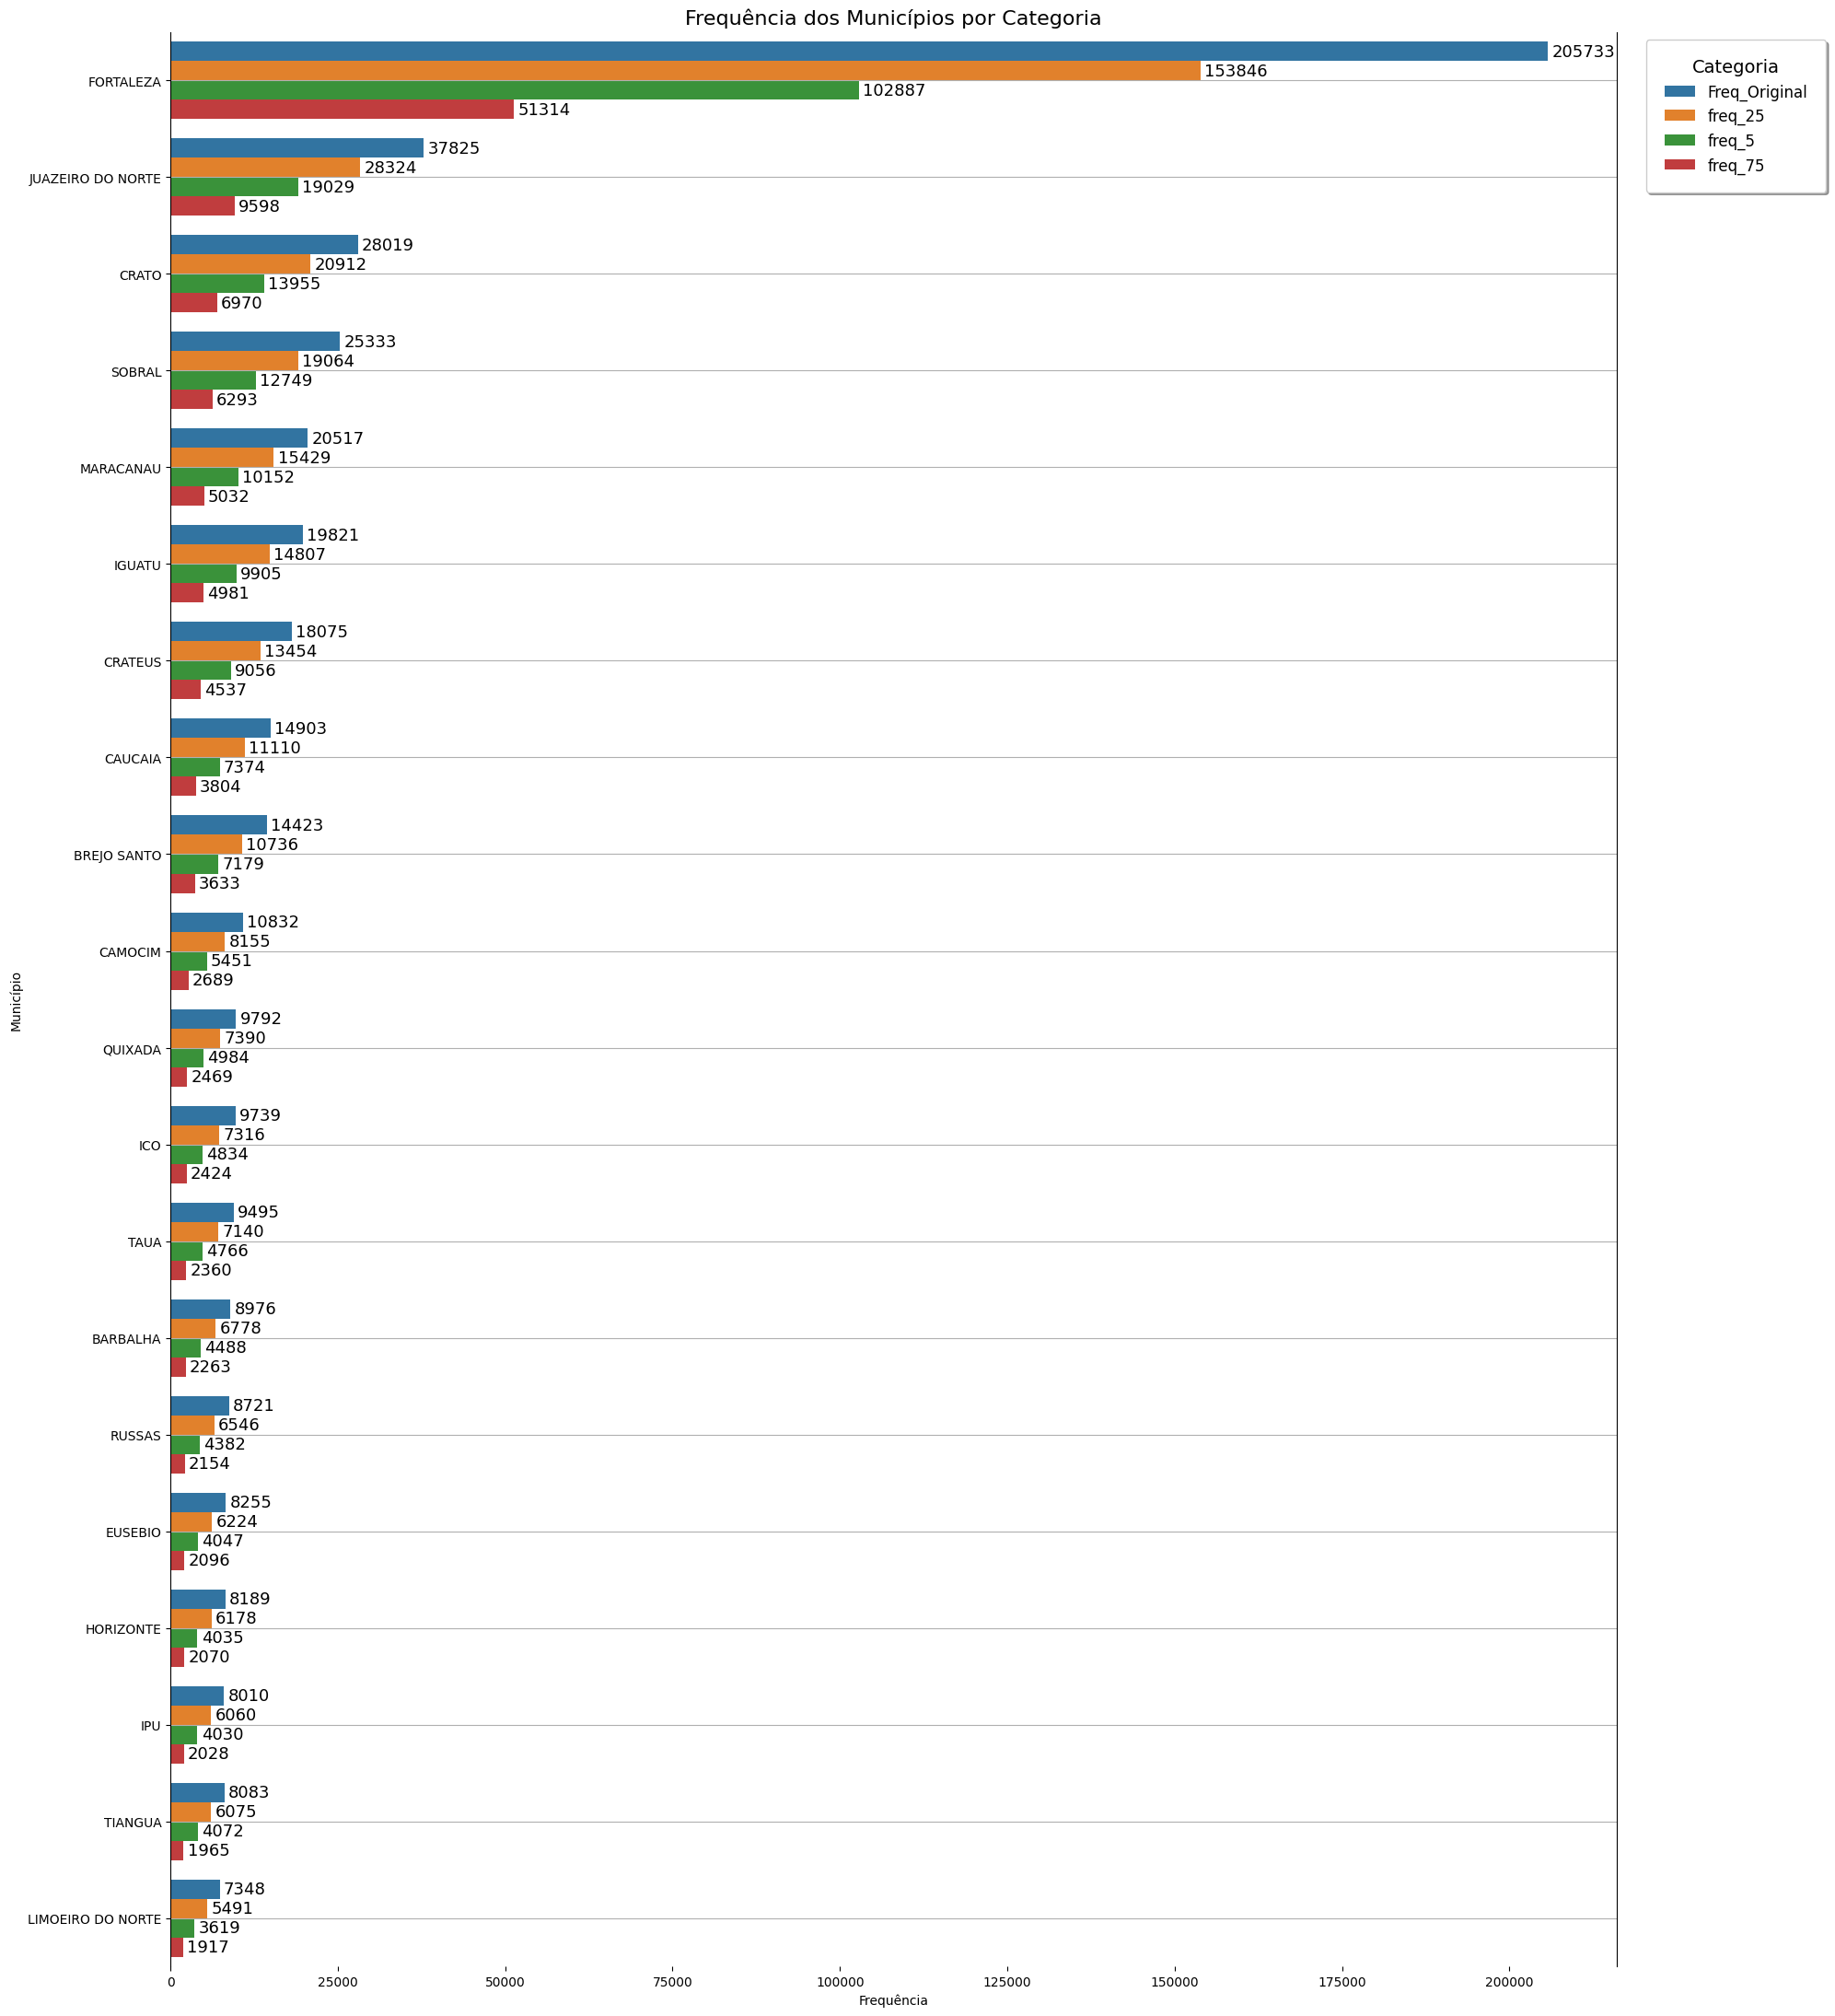

In [36]:
plt.figure(figsize=(20, 22))
ax = sea.barplot(
    subset_mel_vis, y='municipioCaso', x='Frequencia', hue='Categoria'
)
plt.gca().spines[['top','bottom']].set_visible(False)
plt.gca().grid(axis='y')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',              
        label_type='edge',        
        padding=3,                
        fontsize=13,
        color='black'
    )
leg = ax.legend(
    title='Categoria',            
    title_fontsize=14,            
    fontsize=12,                  
    loc='upper right',           
    bbox_to_anchor=(1.15, 1),     
    frameon=True,                 
    shadow=True,                  
    borderpad=1.2                 
)

plt.title('Frequência dos Municípios por Categoria', fontsize=16)
plt.xlabel('Frequência')
plt.ylabel('Município')
plt.tight_layout()
plt.savefig(fname='plots\\plot_k20_total.pdf')

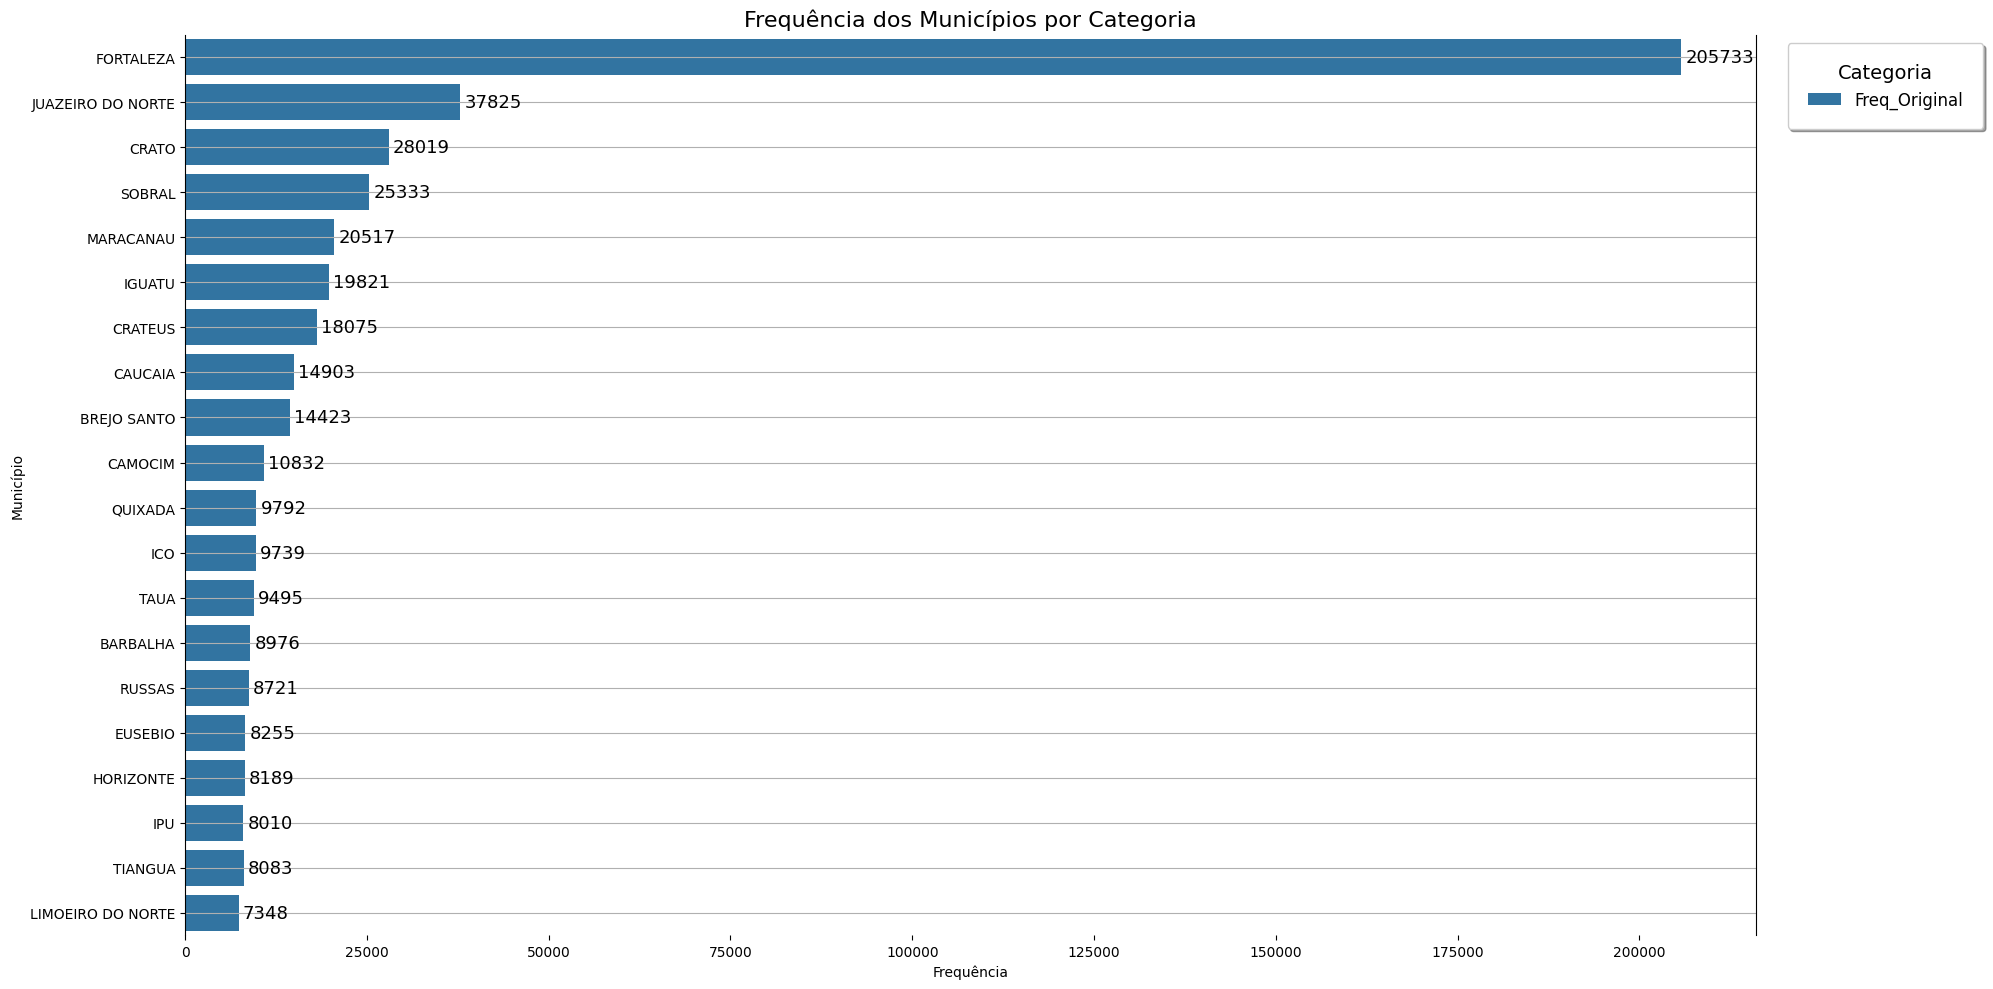

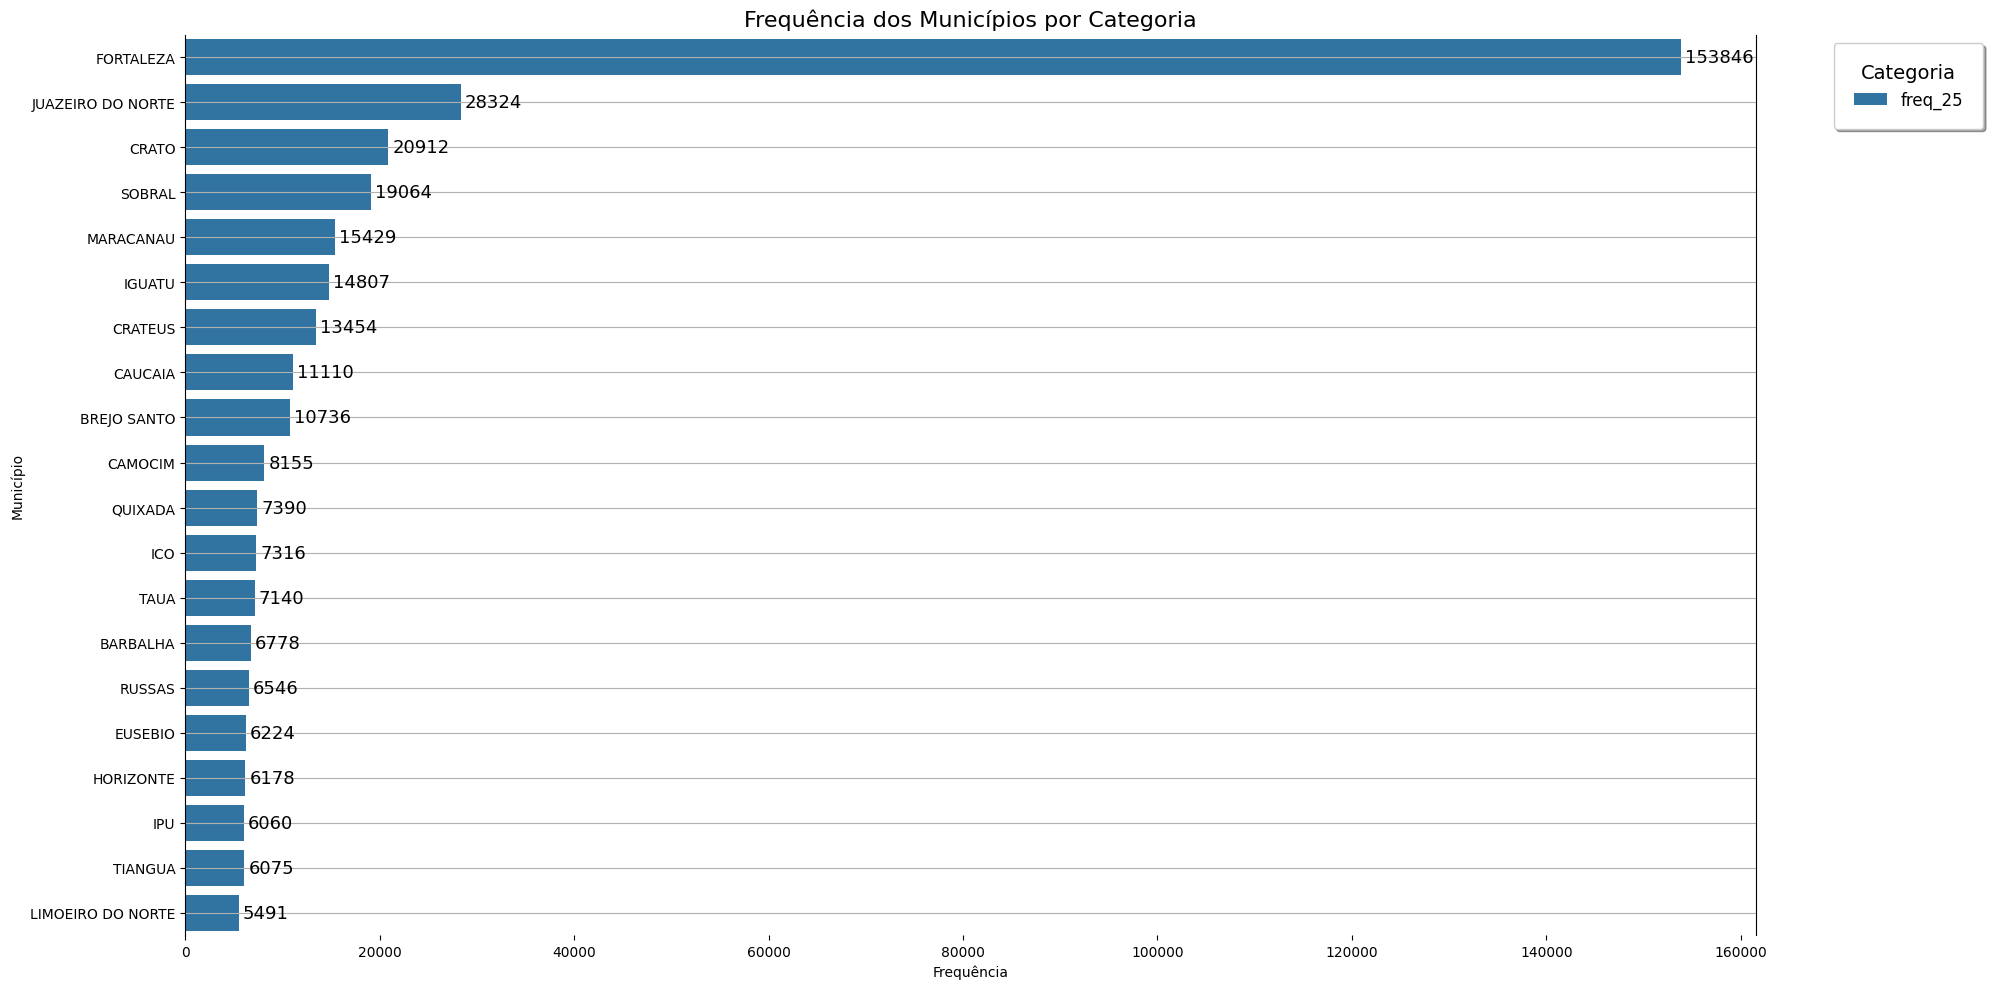

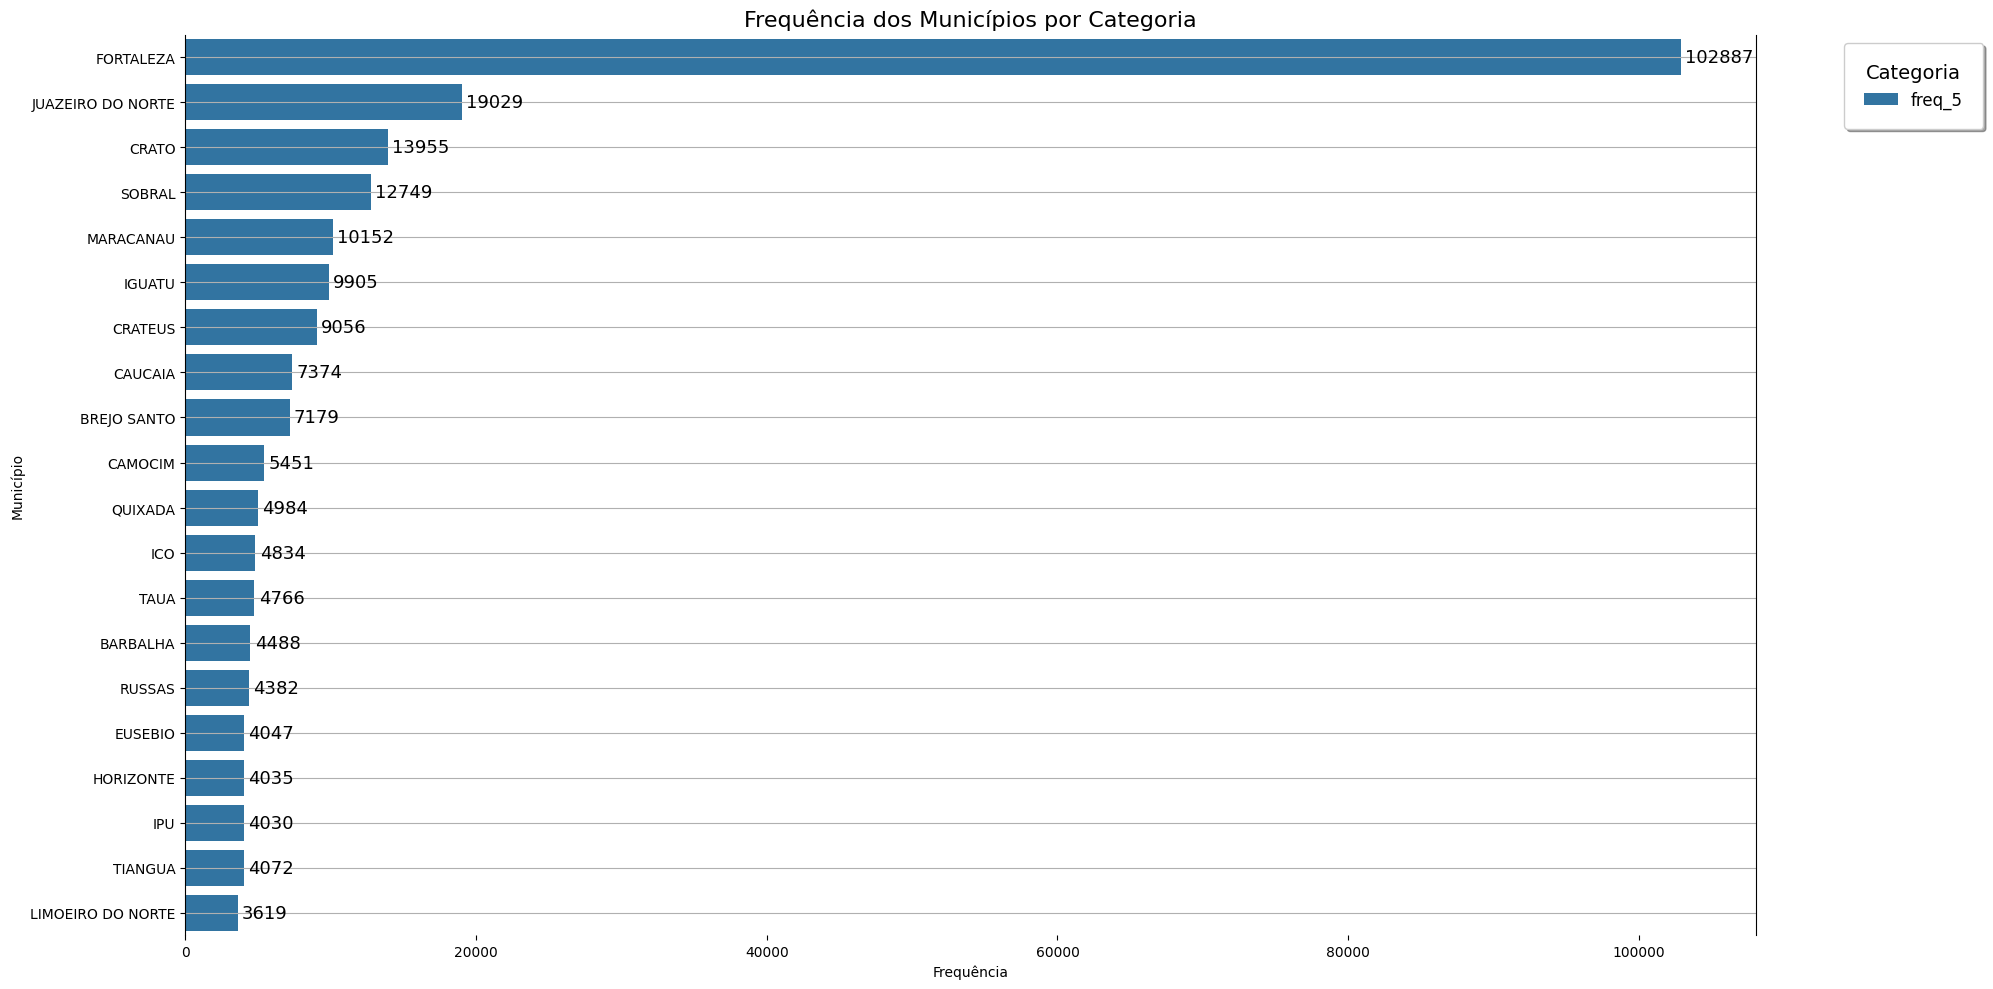

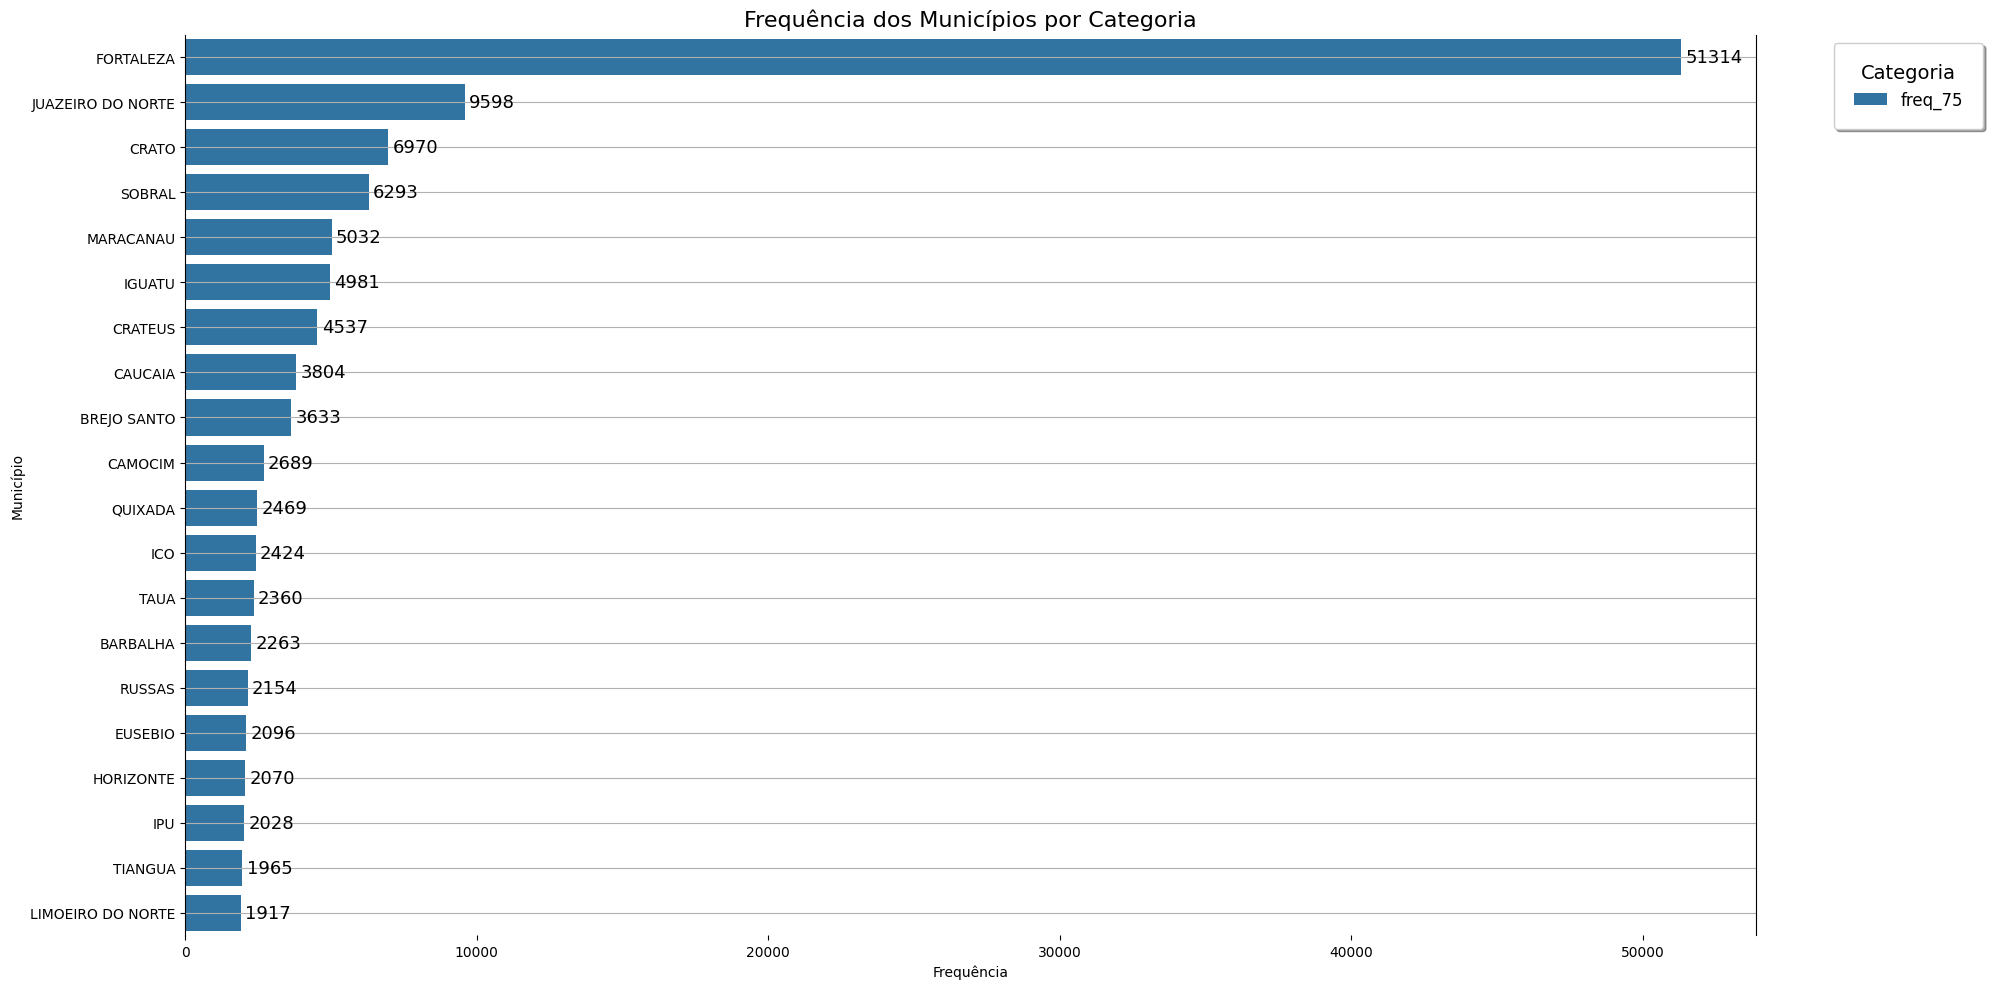

In [37]:
for freq in ["Freq_Original", "freq_25", "freq_5", "freq_75"]:
    plt.figure(figsize=(20, 10))
    sub = subset_mel_vis.filter(pl.col('Categoria')==freq)
    ax = sea.barplot(
        sub, y='municipioCaso', x='Frequencia', hue='Categoria'
    )
    plt.gca().spines[['top','bottom']].set_visible(False)
    plt.gca().grid(axis='y')

    for container in ax.containers:
        ax.bar_label(
            container,
            fmt='%.0f',              
            label_type='edge',        
            padding=3,                
            fontsize=13,
            color='black'
        )
    leg = ax.legend(
        title='Categoria',            
        title_fontsize=14,            
        fontsize=12,                  
        loc='upper right',           
        bbox_to_anchor=(1.15, 1),     
        frameon=True,                 
        shadow=True,                  
        borderpad=1.2                 
    )

    plt.title('Frequência dos Municípios por Categoria', fontsize=16)
    plt.xlabel('Frequência')
    plt.ylabel('Município')
    plt.tight_layout()
    plt.savefig(fname=f'plots\\plot_k20_tota_{freq}.pdf')

In [38]:
print('Salvo na pasta plots , finalizado.')

Salvo na pasta plots , finalizado.
